In [4]:
!pip install astropy
!pip install matplotlib
!pip install numpy
!pip install astroquery


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/4.5 MB 3.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.4/4.5 MB 4.5 MB/s eta 0:00:01
     ----- ---------------------------------- 0.6/4.5 MB 4.9 MB/s eta 0:00:01
     ----------- ---------------------------- 1.4/4.5 MB 7.8 MB/s eta 0:00:01
     ----------------------- ---------------- 2.7/4.5 MB 12.1 MB/s eta 0:00:01
     -------------------------------------- - 4.4/4.5 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------  4.5/4.5 MB 15.2 MB/s eta 0:00:01
     ---------------------------------------  4.5/4.5 MB 15.2 MB/s eta 0:00:01
     ---------------------------------------  4.5/4.5 MB 15.2 MB/s eta 0:00:01
     ---------------------------------------  4.5/4.5 MB 15.2 MB/s eta 0:00:01
     ---------------------------------------  4.5/4.5 MB 15.2 MB/s eta 0:00:01
     ---------------------------------------  4.5/4.5 MB 15.2 MB


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.modeling.models import custom_model
from astropy.modeling import Fittable1DModel, Parameter
from astroquery.sdss import SDSS

In [6]:
spectrum = SDSS.get_spectra(plate=1349, fiberID=216, mjd=52797)[0]

In [7]:
spectrum[1].columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

In [8]:
flux = spectrum[1].data['flux']
lam = 10**(spectrum[1].data['loglam'])

In [9]:
#Units of the flux
units_flux = spectrum[0].header['bunit']
print(units_flux)

1E-17 erg/cm^2/s/Ang


In [10]:
#Units of the wavelegth
units_wavelength_full = spectrum[0].header['WAT1_001']
print(units_wavelength_full)

wtype=linear label=Wavelength units=Angstroms


In [11]:
units_wavelength = units_wavelength_full[36:]
print(units_wavelength)

Angstroms


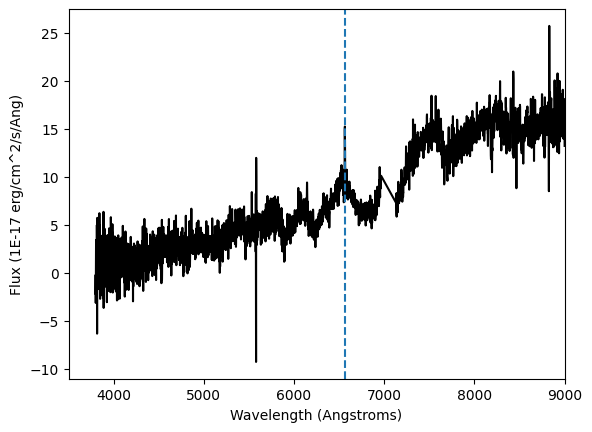

In [14]:
plt.plot(lam, flux, color='k')
plt.xlim(3500,9000)
plt.axvline(x=6563, linestyle='--')
plt.xlabel('Wavelength ({})'.format(units_wavelength))
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

In [15]:
gausian_model = models.Gaussian1D(1, 6563, 10)
fitter = fitting.LevMarLSQFitter()
gaussian_fit = fitter(gausian_model, lam, flux)

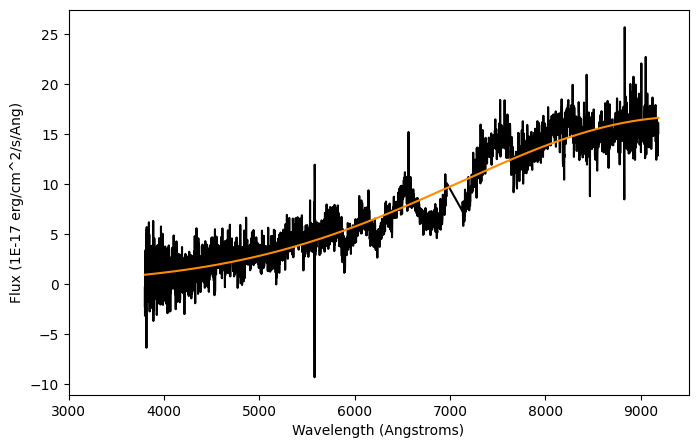

In [20]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, gaussian_fit(lam), color='darkorange')
plt.xlim(3000,9500)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

In [17]:
print(gaussian_fit)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev     
    ----------------- ----------------- -----------------
    16.75070628912542 9456.749530943964 2368.395706441934


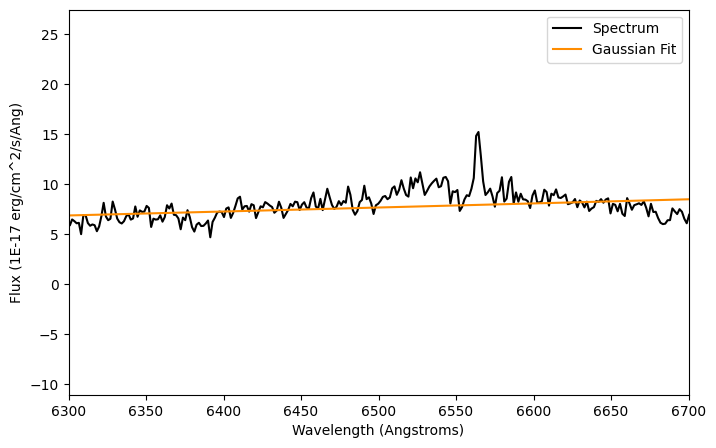

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean             stddev     
    ------------------ ----------------- -----------------
    16.750670773808842 9456.736472174824 2368.389653100175


In [37]:
# Adjust initial parameters for better fitting
initial_amplitude = 7  
initial_mean = 2500
initial_stddev= 9000

gaussian_model = models.Gaussian1D(initial_amplitude, initial_mean, initial_stddev)
fitter = fitting.LevMarLSQFitter()
gaussian_fit = fitter(gaussian_model, lam, flux)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lam, flux, color='k', label='Spectrum')
plt.plot(lam, gaussian_fit(lam), color='darkorange', label='Gaussian Fit')
plt.xlim(6300, 6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.legend()
plt.show()

# Print the parameters of the fit
print(gaussian_fit)

In [38]:
compound_model = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)

In [39]:
fitter = fitting.LevMarLSQFitter()
compound_fit = fitter(compound_model, lam, flux)

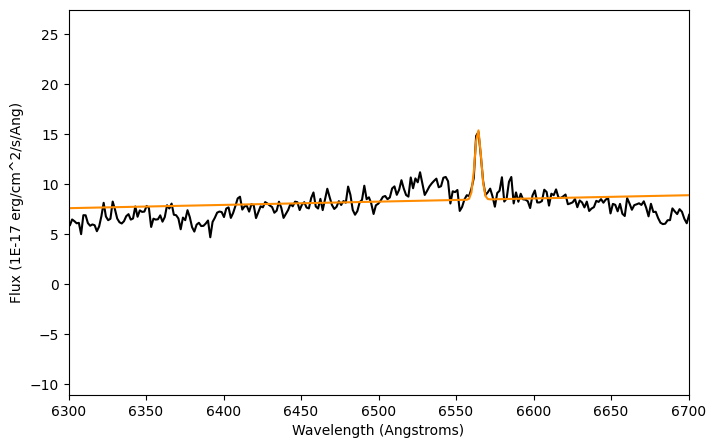

In [40]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, compound_fit(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

In [41]:
print(compound_fit)

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=7.02089174, mean=6564.13631715, stddev=1.97761476)>

    [1]: <Polynomial1D(1, c0=-12.79335619, c1=0.00323995)>
Parameters:
       amplitude_0          mean_0       ...          c1_1        
    ----------------- ------------------ ... ---------------------
    7.020891744278151 6564.1363171493185 ... 0.0032399520530058644


In [42]:
for x,y in zip(compound_fit.param_names, compound_fit.parameters):
    print(x,y)

amplitude_0 7.020891744278151
mean_0 6564.1363171493185
stddev_0 1.9776147551998158
c0_1 -12.79335618554209
c1_1 0.0032399520530058644


In [43]:
compound_fit.amplitude_0

Parameter('amplitude', value=7.020891744278151)

In [44]:
compound_model_fixed = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)
compound_model_fixed.mean_0.fixed = True

In [45]:
fitter = fitting.LevMarLSQFitter()
compound_fit_fixed = fitter(compound_model_fixed, lam, flux)

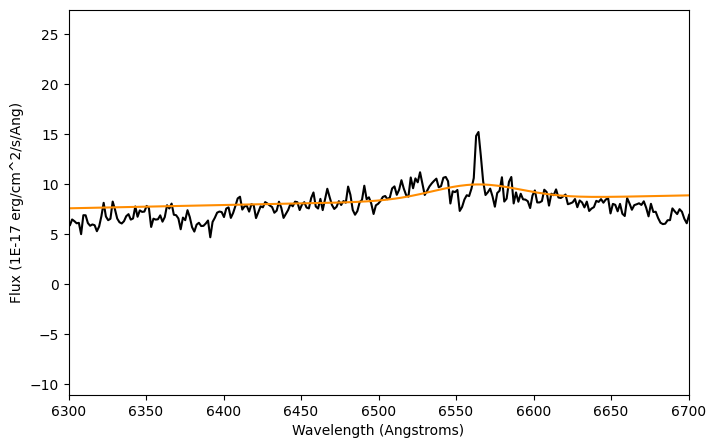

In [46]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, compound_fit_fixed(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

In [47]:
print(compound_fit_fixed)

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1.53257471, mean=6563., stddev=28.57847528)>

    [1]: <Polynomial1D(1, c0=-12.79103, c1=0.00323745)>
Parameters:
       amplitude_0     mean_0 ...         c0_1                 c1_1        
    ------------------ ------ ... ------------------- ---------------------
    1.5325747104576728 6563.0 ... -12.791030002605527 0.0032374486280527933


In [85]:
compound_model_bounded = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)
delta = .8
compound_model_bounded.mean_0.max = 6563 + delta
compound_model_bounded.mean_0.min = 6563 - delta

fitter = fitting.LevMarLSQFitter()
compound_fit_bounded = fitter(compound_model_bounded, lam, flux)

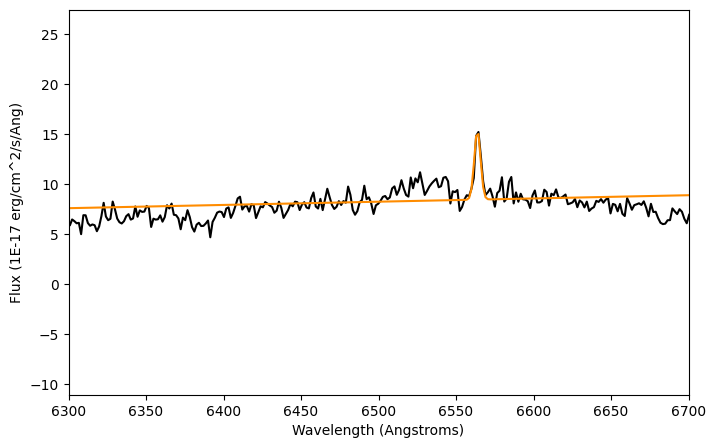

In [86]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, compound_fit_bounded(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

In [50]:
print(compound_fit_bounded)
# minimum value of delta is .4
# the better delta is .8

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=6.65730507, mean=6563.5, stddev=2.09182676)>

    [1]: <Polynomial1D(1, c0=-12.79336254, c1=0.00323995)>
Parameters:
       amplitude_0    mean_0 ...         c0_1                 c1_1        
    ----------------- ------ ... ------------------- ---------------------
    6.657305067408649 6563.5 ... -12.793362542046482 0.0032399500252079877


In [87]:
x1 = np.linspace(0,10,100)

a = 3
b = -2
c = 0
y1 = a*np.exp(b*x1+c)
y1 += np.random.normal(0., 0.2, x1.shape)
y1_err = np.ones(x1.shape)*0.2

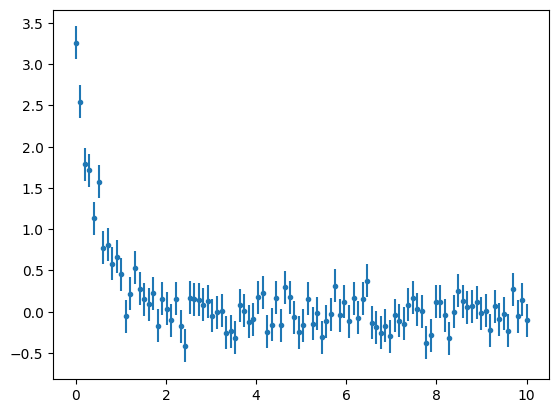

In [88]:
plt.errorbar(x1 , y1, yerr=y1_err, fmt='.')
plt.show()

In [89]:
@custom_model
def exponential(x, a=1., b=1., c=1.):
    '''
    f(x)=a*exp(b*x + c)
    '''
    return a*np.exp(b*x+c)

In [90]:
exp_model = exponential(1.,-1.,1.)  
fitter = fitting.LevMarLSQFitter()
exp_fit = fitter(exp_model, x1, y1, weights = 1.0/y1_err**2)

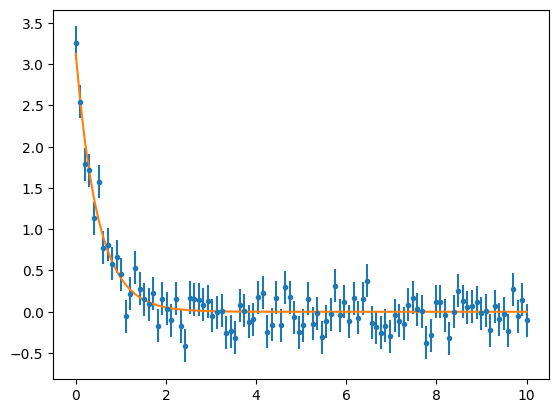

In [91]:
plt.errorbar(x1 , y1, yerr=y1_err, fmt='.')
plt.plot(x1, exp_fit(x1))
plt.show()

In [92]:
print(exp_fit)

Model: exponential
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            a                  b                  c         
    ----------------- ------------------- ------------------
    1.508404435555081 -2.0358592318689794 0.7288009234430983


In [93]:
def calc_reduced_chi_square(fit, x, y, yerr, N, n_free):
    '''
    fit (array) values for the fit
    x,y,yerr (arrays) data
    N total number of points
    n_free number of parameters we are fitting
    '''
    return 1.0/(N-n_free)*sum(((fit - y)/yerr)**2)

In [94]:
calc_reduced_chi_square(exp_fit(x1), x1, y1, y1_err, len(x1), 3)

0.8461438068729087

In [95]:
x2 = np.linspace(0,10,100)
a = 3
b = 2
c = 4
d = 1
y2 = a*np.sin(b*x2+c)+d
y2 += np.random.normal(0., 0.5, x2.shape)
y2_err = np.ones(x2.shape)*0.3

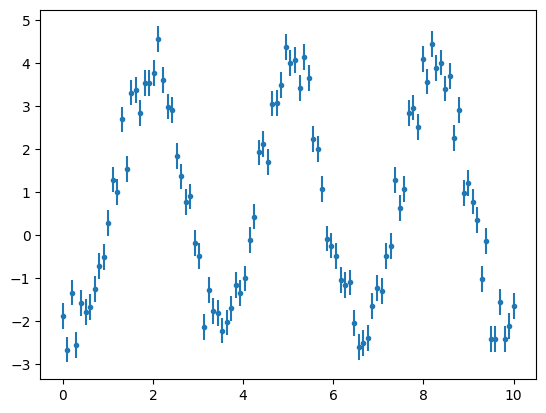

In [96]:
plt.errorbar(x2, y2, yerr=y2_err, fmt='.')
plt.show()

In [97]:
class SineNew(Fittable1DModel):
    a = Parameter(default=1.)
    b = Parameter(default=1.)
    c = Parameter(default=1.)
    d = Parameter(default=1.)
        
    @staticmethod
    def evaluate(x, a, b, c, d):
        return a*np.sin(b*x+c)+d
    
    @staticmethod
    def fit_deriv(x, a, b, c, d):
        d_a = np.sin(b*x+c)
        d_b = a*np.cos(b*x+c)*x
        d_c = a*np.cos(b*x+c)
        d_d = np.ones(x.shape)
        return [d_a, d_b, d_c, d_d]

In [133]:
sine_model = SineNew(a=5,b=2,c=10.,d=0.)  
fitter = fitting.LevMarLSQFitter()
sine_fit = fitter(sine_model, x2, y2, weights = 1.0/y2_err**2)

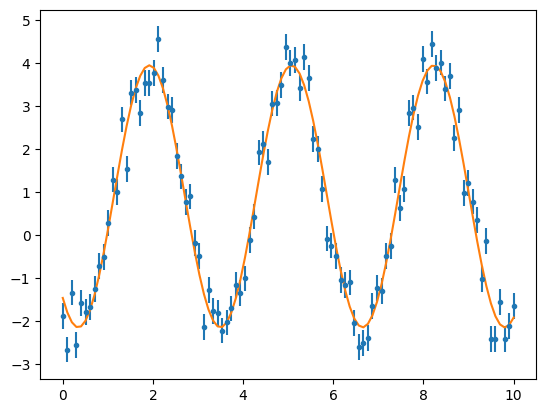

In [134]:
plt.errorbar(x2, y2, yerr=y2_err, fmt='.')
plt.plot(x2,sine_fit(x2))
plt.show()

In [100]:
print(sine_fit)

Model: SineNew
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            a                 b                  c                 d         
    ----------------- ------------------ ----------------- ------------------
    3.051592018728246 1.9923981509286723 4.028574375812263 0.8972251686624828


In [101]:
calc_reduced_chi_square(sine_fit(x2), x2, y2, y2_err, len(x2), 3)

2.3423502176761635

In [135]:
x3 = np.linspace(-2,3,100)
y3 = x3**2* np.exp(-0.5 * (x3)**3 / 2**2)
y3 += np.random.normal(0., 0.5, x3.shape)
y3_err = np.ones(x3.shape)*0.5

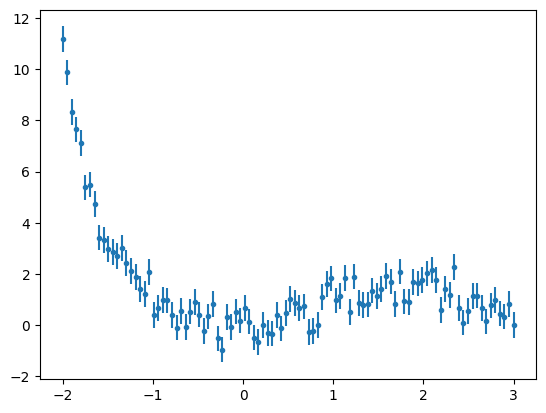

In [136]:
plt.errorbar(x3,y3,yerr=y3_err,fmt='.')
plt.show()